# Horse or Human 人马识别


数据集：https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip

问题：二分类图像识别

说明：
>包含了名为horse和human两个文件夹，包含了两种图片，分别是马和人的图片  
>每种图片大约500张，每个图片大小是300x300，每个像素3byte

---

训练集文件夹


训练集标签文件夹
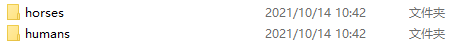

- horse-or-human自建数据集图像识别.ipynb
- horses-or-human
-- horses
-- humans

加载方法：通过pytorch的ImageFolder进行加载

In [1]:
import os

import torch
from torch.utils.data import Dataset, TensorDataset, DataLoader #数据集打开加载工具

from torchvision import transforms,utils,datasets # 图片增强工具

from PIL import Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.定义transform增强数据

```PYTHON
from torchvision import transforms
```

**1.定义transform参数**
```python
trans变量 = transforms.Compose([
    # 缩放图片Image，保持长宽比不变，最短边为__像素
    transforms.Resize(缩放像素), 
    # 从图片中间切出__*__图片
    transforms.CenterCrop(像素), 
    # 将图片Image转成Tensor格式(通道,高,宽),并归一化至[0,1]
    transforms.ToTensor(),        
])
```

**2.用transform变量变换处理图片**
```python
图片img = trans变量(图片img)
```

In [2]:
data_transform = transforms.Compose([
    transforms.Resize(32),  # 缩放图片Image，保持长宽比不变，最短边为32像素
    transforms.CenterCrop(32),  #从图片中间切出32*32图片
    transforms.ToTensor(),  # 将图片Image转成Tensor格式(通道,高,宽),并归一化至[0,1]
])

## 2.使用ImageFolder进行数据集导入(生成数据集dataset)

```python
from torchvision import datasets
```

**1.不使用transform增强导入生成数据集**
```python
数据集变量 = datasets.ImageFolder(
    root = './训练数据根文件夹路径',  
    transform = None          
)
```

**2.使用transform增强导入生成数据集**
```python
数据集变量 = datasets.ImageFolder(
    root = './训练数据根文件夹路径',  
    transform = trans变量          
)
```

---
>注意：
>>*文件夹从上往下依次会被编码作为数据集的标签label*  
>>*可通过`数据集 = TensorDataset(样本data, 标签labels)`创建数据集*


In [3]:
# 原始数据集

dataset = datasets.ImageFolder(
    root = './horses-or-human',   # 训练数据根文件夹路径
    transform = None    # transform增强调用
)

0
(300, 300)


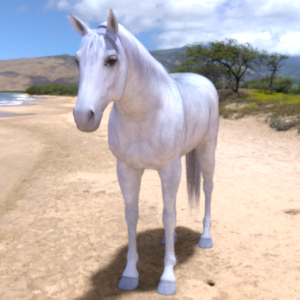

In [4]:
# 查看数据集第一个样例

img, label = dataset[0]
print(label)
print(img.size)
img

In [5]:
# Transform增强后数据集

dataset = datasets.ImageFolder(
    root = './horses-or-human',   # 训练数据根文件夹路径
    transform = data_transform    # transform增强调用
)

In [6]:
# 查看数据集第一个样例

img, label = dataset[0]
print(label)
print(img.shape)
img

0
torch.Size([3, 32, 32])


tensor([[[0.4549, 0.4627, 0.4784,  ..., 0.9020, 0.8902, 0.9098],
         [0.4706, 0.4784, 0.4784,  ..., 0.8000, 0.7882, 0.8118],
         [0.4824, 0.4784, 0.4784,  ..., 0.8157, 0.8039, 0.8157],
         ...,
         [0.8706, 0.8510, 0.8431,  ..., 0.9882, 0.9922, 0.9843],
         [0.8706, 0.8627, 0.8627,  ..., 0.9961, 0.9922, 0.9922],
         [0.8667, 0.8745, 0.8549,  ..., 0.9843, 0.9922, 0.9882]],

        [[0.6314, 0.6314, 0.6314,  ..., 0.9529, 0.9451, 0.9647],
         [0.6471, 0.6471, 0.6471,  ..., 0.8549, 0.8510, 0.8745],
         [0.6706, 0.6706, 0.6667,  ..., 0.8824, 0.8784, 0.8863],
         ...,
         [0.7451, 0.7255, 0.7216,  ..., 0.8627, 0.8667, 0.8627],
         [0.7490, 0.7412, 0.7412,  ..., 0.8706, 0.8745, 0.8706],
         [0.7490, 0.7490, 0.7333,  ..., 0.8588, 0.8745, 0.8706]],

        [[0.8824, 0.8784, 0.8706,  ..., 1.0000, 1.0000, 1.0000],
         [0.9020, 0.8980, 0.8941,  ..., 0.9647, 0.9686, 0.9882],
         [0.9294, 0.9255, 0.9216,  ..., 0.9922, 0.9961, 1.

# 3.加载数据集（loader）

```python
from torch.utils.data import DataLoader 
```

```python
loader变量 = DataLoader(
    数据集, 
    batch_size=一次训练图片数, 
    shuffle=True/False是否随机选择数据
)
```

In [7]:
dataset_loader = DataLoader(dataset, batch_size=256, shuffle=True)

In [8]:
images, labels = next(iter(dataset_loader))

print(images[5])
print(labels[5])

tensor([[[0.7176, 0.7176, 0.7176,  ..., 0.9216, 0.9373, 0.9608],
         [0.7490, 0.7490, 0.7490,  ..., 0.9686, 0.9804, 0.9961],
         [0.8863, 0.8196, 0.7882,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.1686, 0.1490, 0.1647,  ..., 0.1373, 0.2510, 0.1961],
         [0.2000, 0.1686, 0.1804,  ..., 0.1098, 0.1922, 0.2039],
         [0.1922, 0.2275, 0.1451,  ..., 0.0706, 0.1098, 0.1137]],

        [[0.7922, 0.7922, 0.7922,  ..., 0.9961, 1.0000, 1.0000],
         [0.8196, 0.8196, 0.8196,  ..., 1.0000, 1.0000, 1.0000],
         [0.9176, 0.8745, 0.8549,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.1373, 0.1255, 0.1412,  ..., 0.1098, 0.2000, 0.1569],
         [0.1608, 0.1412, 0.1529,  ..., 0.0980, 0.1569, 0.1608],
         [0.1647, 0.1961, 0.1255,  ..., 0.0588, 0.0863, 0.0902]],

        [[0.8667, 0.8667, 0.8667,  ..., 1.0000, 1.0000, 1.0000],
         [0.8863, 0.8863, 0.8863,  ..., 1.0000, 1.0000, 1.0000],
         [0.9451, 0.9216, 0.9137,  ..., 1.0000, 1.0000, 1.

# 4.构建神经网络


```python
# 导入包
import torch
from torch import nn, optim
import torch.nn.functional as F

# 定义神经网络类
class 自定义神经网络类名(nn.Module):
    # 可学习参数的层（如全连接层、卷积层等）
    def __init__(self):
        super().__init__()
        self.自定义layer名1 = nn.layer层(参数)
        self.自定义layer名2 = nn.layer层(参数)
        self.自定义layer名3 = nn.Sequential(
            nn.layer层(参数),
            nn.layer层(参数)
        )
        
    # 实现模型的功能，实现各个层之间的连接关系
    # nn.functional实现不具有可学习参数的层(如ReLU、dropout、BatchNormanation层)的构造
    def forward(self, x):
        x = self.自定义layer名1(x)
        x = F.不可学习参数层(x)
        x = self.自定义layer名2(x)
        x = 不可学习参数层(自定义layer名3(x)
        return x


# 实例化神经网络
model实例 = 自定义神经网络类名()


# 保存模型
torch.save(model实例, '存储路径')

# 加载模型
model = torch.load("model.pth")

```

In [9]:
import torch
from torch import nn, optim
import torch.nn.functional as F


# 定义神经网络类
class CNN(nn.Module):
    # 可学习参数的层（如全连接层、卷积层等）
    def __init__(self):
        super().__init__()
        
        # 第一部分卷积层1
        self.conv1 = nn.Sequential(
            # 卷积层(输入通道维1，输出通道维16，卷积核3)
            nn.Conv2d(3, 16, kernel_size=(3,3), stride=1, padding=1),  # 维度变换(3,32,32) （黑白图像1通道，长28像素，宽28像素）->(16,32,32) （16个卷积核提取16个特征通道，长28，宽28）图像边缘扩展，没被卷积抛去
            # 激活函数
            nn.ReLU(),
            # 池化层
            nn.MaxPool2d(2) # 维度变化(16,32,32)->(16,16,16)
        )
            
        #第二部分卷积层2
        self.conv2 = nn.Sequential(
            # 卷积层(输入通道维1，输出通道维16，卷积核3)
            nn.Conv2d(16, 32, kernel_size=(3,3), stride=1, padding=1),  # 维度变换(16,16,16)->(32,16,16)
            # 激活函数
            nn.ReLU(),
            # 池化层
            nn.MaxPool2d(2) # 维度变化(32,14,14)->(32,8,8)
        )
            
        # 全连接层
        self.out = nn.Linear(32*8*8, 2)
            
            
        
    # 实现模型的功能，实现各个层之间的连接关系
    def forward(self, x):
        # 执行卷积层1 conv1
        x = self.conv1(x)
        # 执行卷积层2 conv2
        x = self.conv2(x)
        # 将图像数据转为1维
        x = x.view(x.size(0),-1)
        # 执行全连接层 out
        x = self.out(x)
        return x

# 5.训练模型
(需要torchkeras支持)  
import from torchkeras import summary,Model 

1.实例化模型  
```
model = Model(自定义神经网络类名())
```

2.编译模型
```
model.compile(loss_func = 损失函数,
             optimizer= 优化方法,
             metrics_dict={"accuracy":accuracy})
```

3.训练模型
```
dfhistory = model.fit(训练次数,train_loader, test_loader, log_step_freq=100) 
```

In [10]:
from torchkeras import summary,Model

# 实例化模型
model = Model(CNN())
model = model.float()

# 查看模型
print(model)
print(summary(model, input_shape=(3,32,32)))

Model(
  (net): CNN(
    (conv1): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (conv2): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (out): Linear(in_features=2048, out_features=2, bias=True)
  )
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
              ReLU-2           [-1, 16, 32, 32]               0
         MaxPool2d-3           [-1, 16, 16, 16]               0
            Conv2d-4           [-1, 32, 16, 16]           4,640
              ReLU-5           [-1, 32, 16, 16]               0
         MaxPool2d-6             [-1, 

In [11]:
from sklearn.metrics import accuracy_score

def accuracy(y_pred,y_true):
    y_pred_cls = torch.argmax(nn.Softmax(dim=1)(y_pred),dim=1).data
    return accuracy_score(y_true.numpy(),y_pred_cls.numpy())

# 编译模型
model.compile(loss_func = nn.CrossEntropyLoss(),
             optimizer= torch.optim.Adam(model.parameters(),lr = 0.02),
             metrics_dict={"accuracy":accuracy})

In [12]:
# 训练模型
dfhistory = model.fit(5,dataset_loader, log_step_freq=100) 

Start Training ...

================================================================================2021-10-18 16:29:50

 +-------+------+----------+
| epoch | loss | accuracy |
+-------+------+----------+
|   1   | 1.95 |  0.449   |
+-------+------+----------+

================================================================================2021-10-18 16:30:00

 +-------+-------+----------+
| epoch |  loss | accuracy |
+-------+-------+----------+
|   2   | 0.713 |  0.457   |
+-------+-------+----------+

================================================================================2021-10-18 16:30:03

 +-------+-------+----------+
| epoch |  loss | accuracy |
+-------+-------+----------+
|   3   | 0.703 |  0.412   |
+-------+-------+----------+

================================================================================2021-10-18 16:30:07

 +-------+------+----------+
| epoch | loss | accuracy |
+-------+------+----------+
|   4   | 0.7  |  0.479   |
+-------+------+----------+

# 模型预测

In [13]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchkeras import summary,Model
from sklearn.metrics import accuracy_score


(300, 300)


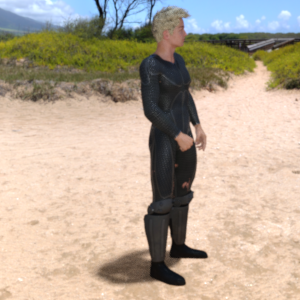

In [14]:
# 手动导入预测数据
from PIL import Image

img = Image.open('./horses-or-human/humans/human10-03.png').convert('RGB')  # 注意：不用.convert('RGB')的话，读出来的是RGBA四通道

print(img.size)
img



In [15]:
# 图片转换成tensor格式
from torchvision import transforms

trans = transforms.Compose([
    transforms.Resize(32),  # 缩放图片Image，保持长宽比不变，最短边为32像素
    transforms.CenterCrop(32),  #从图片中间切出32*32图片
    transforms.ToTensor(),  # 将图片Image转成Tensor格式(通道,高,宽),并归一化至[0,1]
])


img = trans(img)

print(img)
print(img.shape)

tensor([[[0.7255, 0.7451, 0.7529,  ..., 0.6157, 0.6275, 0.6118],
         [0.5020, 0.5843, 0.6627,  ..., 0.6627, 0.7333, 0.6549],
         [0.4353, 0.4392, 0.4471,  ..., 0.7059, 0.6784, 0.6549],
         ...,
         [0.9882, 0.9882, 0.9843,  ..., 0.9490, 0.9529, 0.8941],
         [0.9529, 0.9765, 0.9765,  ..., 0.9569, 0.9176, 0.8824],
         [0.8863, 0.9569, 0.9725,  ..., 0.9569, 0.9098, 0.9098]],

        [[0.8157, 0.8353, 0.8392,  ..., 0.8078, 0.8118, 0.8039],
         [0.5961, 0.6706, 0.7529,  ..., 0.8314, 0.8667, 0.8235],
         [0.5255, 0.5333, 0.5373,  ..., 0.8353, 0.8118, 0.8000],
         ...,
         [0.8706, 0.8667, 0.8667,  ..., 0.8235, 0.8314, 0.7765],
         [0.8275, 0.8510, 0.8549,  ..., 0.8314, 0.7922, 0.7608],
         [0.7569, 0.8275, 0.8471,  ..., 0.8314, 0.7843, 0.7804]],

        [[0.9490, 0.9686, 0.9765,  ..., 1.0000, 1.0000, 1.0000],
         [0.7333, 0.8078, 0.8863,  ..., 1.0000, 1.0000, 1.0000],
         [0.6353, 0.6510, 0.6706,  ..., 0.9961, 0.9961, 0.

In [16]:
# 将图片数据集变为（图片数量，通道，长，宽）

img = img.reshape(1,3,32,32)
print('添加图片数量维度', img.shape)

添加图片数量维度 torch.Size([1, 3, 32, 32])


In [17]:
output = model(img)
print(output)

print('------')
prediction = torch.max(output, dim=1)
print(prediction)

tensor([[-0.0486,  0.0612]], grad_fn=<AddmmBackward>)
------
torch.return_types.max(
values=tensor([0.0612], grad_fn=<MaxBackward0>),
indices=tensor([1]))
